# Project 3: Non-Linearity and Activation Functions

## 📚 Section 1: Recap — What Linear Models Can and Cannot Do

🎯 Objective:

- Quickly recap linear models from Notebook 2.

- Highlight their limitations.

### 🧠 Markdown Cell 1.1: What Linear Models Can and Cannot Do

# 1.1 Recap: What Linear Models Can and Cannot Do

✅ In the previous notebook, you built a **linear model** from scratch.

A **linear model** makes predictions using the formula:

$$
\hat{y} = XW + b
$$

Where:
- $X$ = inputs  
- $W$ = weights  
- $b$ = bias

---

✅ Linear models are **powerful** for capturing:

- Straight-line relationships  
- Plane-like relationships in higher dimensions

---

🔵 **Limitations of Linear Models:**

- Can only model **linear** relationships between input and output  
- Cannot capture **nonlinear** patterns (e.g., curves, circles, XOR problems)  
- Stacking multiple linear layers without nonlinearity still results in a **linear transformation**

---

📣 **Important:**  
If the true relationship between input and output is **nonlinear**, a linear model will **underfit** — it simply cannot learn the correct mapping.


### ✍️ Practice Task 1.1: Quick MCQs (Memory Check)

### 🛠️ Practice Exercise 1.1 (MCQs)

✅ Choose the correct answers:

---

**Q1. What type of relationship can a simple linear model capture?**

- [x] Linear relationship
- [ ] Nonlinear relationship
- [ ] Cyclical patterns
- [ ] Circular clusters

---

**Q2. If you stack two linear layers without any activation in between, what is the result?**

- [x] Still a linear transformation
- [ ] A nonlinear transformation
- [ ] A quadratic model
- [ ] A deep curved network

---

✅ Write your selected answers below.
✅ If unsure, revisit the recap notes above!

---


## 📚 Section 2: Visual Demo — Nonlinear Pattern (Synthetic Data)

🎯 Objective:

- Generate a simple synthetic dataset showing a nonlinear relationship.

- Visualize it clearly.

- Students realize linear models won't be enough.

### 🧠 Markdown Cell 2.1: Setting up the Problem

# 2.1 Visualizing a Nonlinear Pattern

✅ To truly understand **why linear models are limited**,  
we will **create a small synthetic dataset** that has a **nonlinear relationship** between inputs and outputs.

---

### 🔵 Idea:

- Generate input $x$ values (e.g., from 0 to 2)  
- Create target $y$ values that depend on a **nonlinear** function of $x$  
- Example: $y = x^2 + \text{small noise}$

✅ This is **NOT** a straight line — it's a **curve (parabola)**!

---

### 📊 We Will:

- Plot the data  
- See why a **straight-line model** cannot fit this well


### ✍️ Practice Task 2.1: Generate and Plot Nonlinear Data

### 🛠️ Practice Exercise 2.1

✅ **Your Task:**

- Generate 100 data points:
  - Inputs $x$ from 0 to 2  
  - Targets $y$ as $y = x^2 + \text{noise}$  
  - Add small random noise to make it realistic

---

### 🔔 Hints:

- Use `torch.linspace(0, 2, 100)` to create evenly spaced $x$ values  
- Add noise with: `torch.randn_like(x) * 0.1`

---

✅ **Then:**

- Plot $x$ vs $y$ using `matplotlib`  
- You should see a **curved pattern** — **not a straight line**!


### 🖥️ Expected Solution (for you internally)

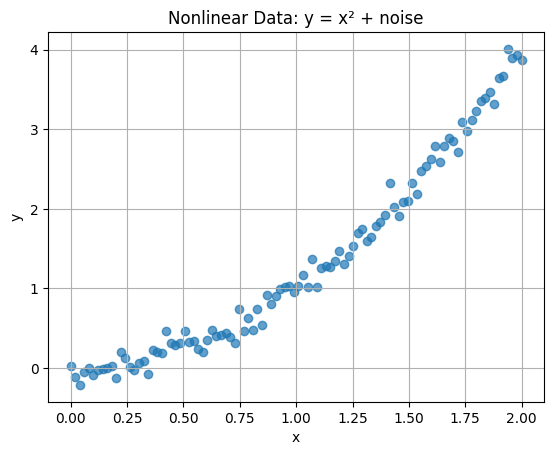

In [39]:
import torch
import matplotlib.pyplot as plt

# Generate inputs
x = torch.linspace(0, 2, 100).unsqueeze(1)  # (100, 1) shape

# Generate nonlinear targets with small noise
y = x**2 + 0.1 * torch.randn_like(x)

# Plot
plt.scatter(x.numpy(), y.numpy(), alpha=0.7)
plt.title('Nonlinear Data: y = x² + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## 📚 Section 3: Stacking Linear Layers (Without Activation)

🎯 Objective:

- Help students understand that stacking linear layers without activation is still linear.

- Code a small model manually: Linear → Linear (no activation).

- Observe that it cannot capture nonlinearity.

### 🧠 Markdown Cell 3.1: What Happens if We Stack Linear Layers?

# 3.1 Stacking Linear Layers Without Activation

✅ A natural question might be:

> "If a single linear model is not enough, what if we just stack two linear models together?"

---

🔵 **Important Insight:**

- Stacking two linear layers **without any nonlinearity** (activation function)  
  **is equivalent** to **a single linear transformation**.
- Mathematically:
  - Linear(Linear(X)) ➔ still Linear(X)

✅ So just stacking multiple linear transformations **does NOT solve** the nonlinearity problem!

---


### ✍️ Practice Task 3.1: Implement Stacked Linear Layers (No Activation)

# 🛠️ Practice Exercise 3.1

✅ Your Task:

- Build a small model with two linear layers, **without any activation in between**.

---

🔔 *Hints:*
- First Linear Layer: input → hidden
- Second Linear Layer: hidden → output
- Shapes:
  - Input dimension: 1
  - Hidden dimension: 5 (you can pick small)
  - Output dimension: 1

✅ Steps:
1. Manually initialize two sets of weights and biases:
   - W1, b1 for first layer
   - W2, b2 for second layer
2. Define a `predict(X)` function that:
   - Applies first linear layer
   - Applies second linear layer
3. Test `predict(X)` on your synthetic x-data from Section 2.

---


### 🖥️ Expected Solution (for you internally)

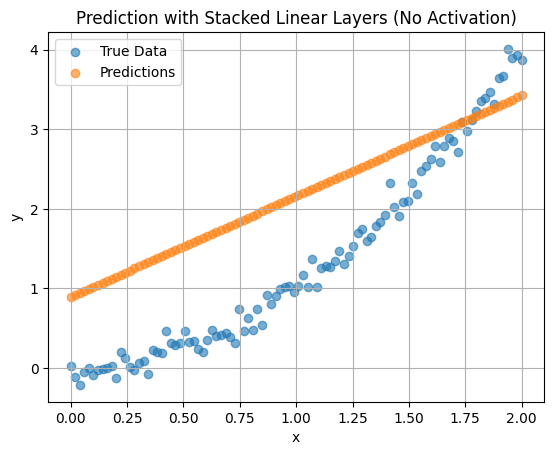

In [40]:
import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Dimensions
input_dim = 1
hidden_dim = 5
output_dim = 1

# Initialize parameters
W1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
b1 = torch.randn(hidden_dim, requires_grad=True)
W2 = torch.randn(hidden_dim, output_dim, requires_grad=True)
b2 = torch.randn(output_dim, requires_grad=True)

# Predict function (no activation)
def predict(X):
    hidden = X @ W1 + b1
    output = hidden @ W2 + b2
    return output

# Test prediction
y_pred = predict(x)

# Plot
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.6)
plt.scatter(x.numpy(), y_pred.detach().numpy(), label='Predictions', alpha=0.6)
plt.legend()
plt.title('Prediction with Stacked Linear Layers (No Activation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## 📚 Section 4: Activation Functions — Concept and Examples

🎯 Objective:

- Introduce what activation functions are and why they are needed.

- Cover three basic activations:

    - ReLU

    - Sigmoid

    - Tanh

- Show their mathematical form, visual shapes, and basic properties.

### 🧠 Markdown Cell 4.1: What Are Activation Functions?

# 4.1 Introduction to Activation Functions

✅ In the previous section, we saw that **stacking linear layers** without any nonlinearity **still gives a linear model**.

To make our models **nonlinear** and capable of learning complex patterns,  
we need to apply a **nonlinear transformation** between layers —  
this is called an **activation function**.

---

🔵 **Definition:**

> An activation function is applied to the output of a neuron to introduce non-linearity into the model.

✅ This allows the network to:
- Approximate **curved relationships**
- Build **powerful hierarchical representations**
- Solve problems like image recognition, speech, text, etc.

---


### 🧠 Markdown Cell 4.2: Popular Activation Functions

### 4.2 Popular Activation Functions

We will now introduce three of the most common activation functions:

✅ **1. ReLU (Rectified Linear Unit)**  
✅ **2. Sigmoid**  
✅ **3. Tanh**

---

### 🔵 ReLU (Rectified Linear Unit)

**Formula:**

$$
f(x) = \max(0, x)
$$

- If input $x$ is positive, output is $x$  
- If input $x$ is negative, output is $0$

✅ Very simple and fast to compute

---

### 🔵 Sigmoid

**Formula:**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

- Squeezes input into a range between **0 and 1**  
- Commonly used in **binary classification** tasks

---

### 🔵 Tanh (Hyperbolic Tangent)

**Formula:**

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- Squeezes input into a range between **-1 and 1**  
- **Centered around zero** (unlike sigmoid), which can help optimization


### 🧠 Markdown Cell 4.3: Visualizing Activation Functions

### 4.3 Visualizing Activation Functions

✅ Let's now plot these activation functions to **see their shapes**.

---


### 🖥️ Code Cell 4.1: Plot ReLU, Sigmoid, Tanh (Instructor Demo)

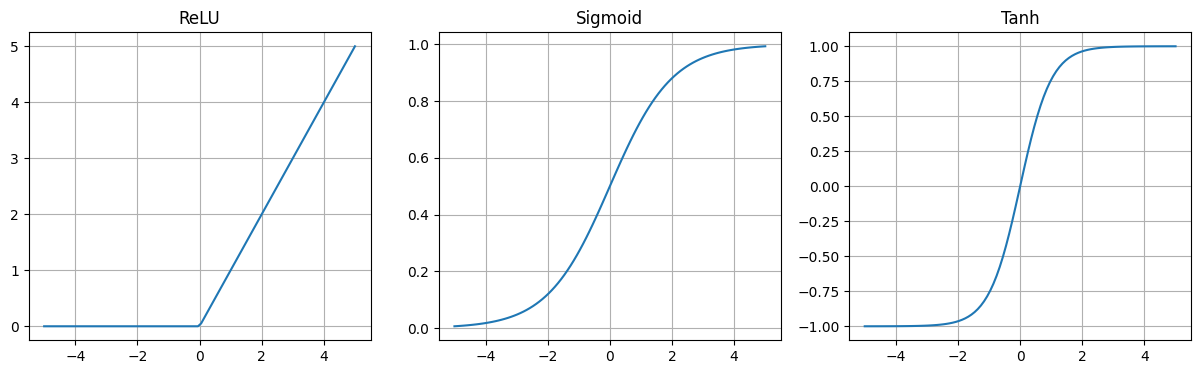

In [41]:
import torch
import matplotlib.pyplot as plt

# Create sample x values
x_vals = torch.linspace(-5, 5, 100)

# ReLU
relu = torch.relu(x_vals)

# Sigmoid
sigmoid = torch.sigmoid(x_vals)

# Tanh
tanh = torch.tanh(x_vals)

# Plot all in subplots
plt.figure(figsize=(15, 4))

# ReLU Plot
plt.subplot(1, 3, 1)
plt.plot(x_vals.numpy(), relu.numpy())
plt.title('ReLU')
plt.grid(True)

# Sigmoid Plot
plt.subplot(1, 3, 2)
plt.plot(x_vals.numpy(), sigmoid.numpy())
plt.title('Sigmoid')
plt.grid(True)

# Tanh Plot
plt.subplot(1, 3, 3)
plt.plot(x_vals.numpy(), tanh.numpy())
plt.title('Tanh')
plt.grid(True)

plt.show()


✅ This will visually show:

    ReLU = sharp cutoff at 0

    Sigmoid = soft S-curve

    Tanh = stretched S-curve centered at 0

## 📚 Section 5: Implementing Activation Functions (Manual)

🎯 Objective:

- Students code simple versions of ReLU, Sigmoid (and optionally Tanh).

- Understand how activation functions work internally — not just using PyTorch built-ins.

- Build coding fluency before using activations inside neural networks.

✅ Style: Markdown explanation ➔ student coding ➔ test.

### 🧠 Markdown Cell 5.1: Why Code Activations Ourselves?

# 5.1 Why Implement Activation Functions Manually?

✅ In practice, PyTorch provides built-in activation functions (`torch.relu`, `torch.sigmoid`, etc.).

✅ But here, we will **manually implement** simple versions of:
- ReLU
- Sigmoid

✅ This will:
- Deepen your understanding.
- Improve your confidence with tensors and operations.
- Help you appreciate what activations do during forward passes.

---


### ✍️ Practice Task 5.1: Code ReLU Manually

# 🛠️ Practice Exercise 5.1: Implement ReLU

✅ Your Task:

- Write a function called `my_relu(x)` that:
  - Takes a tensor `x` as input.
  - Returns a tensor where:
    - Values > 0 stay the same.
    - Values ≤ 0 become 0.

---

🔔 *Hints:*
- Use `torch.clamp(x, min=0)` or
- Use comparison operations if you prefer.


✅ Test your function by passing a tensor like:
```python
test_x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
```

✅ Clear practice task — students must **code ReLU manually**.

### 🖥️ Expected Solution (for you internally)

In [54]:
def my_relu(x):
    return torch.clamp(x, min=0)

# Test
test_x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
print(my_relu(test_x))

tensor([0., 0., 0., 1., 2.])


In [ ]:
✅ Output should be:

tensor([0., 0., 0., 1., 2.])

### ✍️ Practice Task 5.2: Code Sigmoid Manually

# 🛠️ Practice Exercise 5.2: Implement Sigmoid

✅ **Your Task:**

Write a function called `my_sigmoid(x)` that:

- Takes a tensor `x` as input  
- Returns the output using the formula:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

---

### 🔔 Hints:

- Use `torch.exp()` to compute exponentials  
- Follow the formula carefully — apply element-wise operations on the tensor

---

✅ **Test your function with:**

```python
test_x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
```

### 🖥️ Expected Solution (for you internally)

In [55]:
def my_sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Test
test_x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
print(my_sigmoid(test_x))

tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])


In [ ]:
✅ Output should be something like:

tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])

## 📚 Section 6: Building Neural Networks (Manual)

🎯 Objective:

- Students manually build two models:

    - (A) Linear ➔ Linear (no activation)

    - (B) Linear ➔ ReLU ➔ Linear (with activation)

- Understand why activation function matters in model expressiveness.

- Practice managing parameters (weights and biases) manually.

✅ No nn.Module or Sequential yet — fully manual compositions.

### 🧠 Markdown Cell 6.1: What Are We Building?

# 6.1 Building Neural Networks Manually

✅ In this section, you will manually build **two models**:

---

🔵 **Model A: Linear ➔ Linear (No Activation)**

- First Linear Layer
- Second Linear Layer
- No non-linearity between them
- Should behave almost like a simple linear model.

---

🔵 **Model B: Linear ➔ ReLU ➔ Linear**

- First Linear Layer
- Apply ReLU activation
- Second Linear Layer
- This introduces **non-linearity**, allowing better curve fitting.

---

✅ You will:
- Manually initialize all parameters (weights and biases).
- Write the `predict(X)` functions yourself.

---


### ✍️ Practice Task 6.1: Build Model A (Linear ➔ Linear)

# 🛠️ Practice Exercise 6.1: Build Model A (Linear ➔ Linear)

✅ Your Task:

- Create the following parameters:
  - `W1`, `b1` for first layer
  - `W2`, `b2` for second layer
- Write a `predict_linear(X)` function that:
  - Applies first Linear transformation
  - Applies second Linear transformation (no activation)

---

🔔 *Hints:*
- Use `@` for matrix multiplication: `hidden = X @ W1 + b1`
- Then again: `output = hidden @ W2 + b2`
- No activation in between!

✅ Test your predict function on your synthetic `x` data from earlier.

---


### 🖥️ Expected Example Solution (Instructor Only)

In [69]:
torch.manual_seed(42)

input_dim = 1
hidden_dim = 5
output_dim = 1

# Parameters
W1_lin = torch.randn(input_dim, hidden_dim, requires_grad=True)
b1_lin = torch.randn(hidden_dim, requires_grad=True)
W2_lin = torch.randn(hidden_dim, output_dim, requires_grad=True)
b2_lin = torch.randn(output_dim, requires_grad=True)

# Prediction Function
def predict_linear(X):
    hidden = X @ W1_lin + b1_lin
    output = hidden @ W2_lin + b2_lin
    return output

# Test Prediction
y_pred_lin = predict_linear(x)


### ✍️ Practice Task 6.2: Build Model B (Linear ➔ ReLU ➔ Linear)

# 🛠️ Practice Exercise 6.2: Build Model B (Linear ➔ ReLU ➔ Linear)

✅ Your Task:

- Create new parameters:
  - `W1_relu`, `b1_relu` for first layer
  - `W2_relu`, `b2_relu` for second layer
- Write a `predict_relu(X)` function that:
  - Applies first Linear transformation
  - Applies ReLU activation (you can use your `my_relu()` function from Section 5)
  - Applies second Linear transformation

---

🔔 *Hints:*
- After first linear transformation, apply ReLU:
  ```python
  hidden = my_relu(X @ W1_relu + b1_relu)
  ```
- Then second linear transformation:
  ```python
  output = hidden @ W2_relu + b2_relu
  ```

✅ Again, test your predict function on the synthetic x data.


✅ Students **must apply activation manually**.

### 🖥️ Expected Example Solution (Instructor Only)

In [70]:
torch.manual_seed(42)

# Parameters
W1_relu = torch.randn(input_dim, hidden_dim, requires_grad=True)
b1_relu = torch.randn(hidden_dim, requires_grad=True)
W2_relu = torch.randn(hidden_dim, output_dim, requires_grad=True)
b2_relu = torch.randn(output_dim, requires_grad=True)

# Prediction Function
def predict_relu(X):
    hidden = my_relu(X @ W1_relu + b1_relu)
    output = hidden @ W2_relu + b2_relu
    return output

# Test Prediction
y_pred_relu = predict_relu(x)

## 📚 Section 7: Training and Comparing the Models

🎯 Objective:

- Train both manual models (Linear ➔ Linear and Linear ➔ ReLU ➔ Linear).

- Track and plot the loss over epochs.

- See clearly how activation helps learning.

### 🧠 Markdown Cell 7.1: Training the Models

# 7.1 Training Our Models

✅ Now, we will train **both** models:

- Model A: Linear ➔ Linear (no activation)
- Model B: Linear ➔ ReLU ➔ Linear

✅ For each model:
- Initialize parameters.
- For each epoch:
  - Predict outputs
  - Compute Mean Squared Error (MSE) loss
  - Compute gradients using `.backward()`
  - Update parameters manually (using a learning rate)

✅ We will also:
- Store the loss at each epoch.
- Plot loss curves to compare.

---


### ✍️ Practice Task 7.1: Train Both Models

### 🛠️ Practice Exercise 7.1

✅ Your Task:

Train both models for **300 epochs**:

1. Use a simple Mean Squared Error (MSE) loss function:
   ```python
   def mse_loss(preds, targets):
       return ((preds - targets)**2).mean()

2. Use a learning rate of 0.01.

3. After each epoch:

- Predict on training data

- Compute loss

- Zero gradients

- Perform .backward() to compute gradients

- Update parameters manually inside torch.no_grad()

🔔 Hints:

- Use two separate sets of parameters: one for Linear-Linear, another for Linear-ReLU-Linear.

- Store loss values into two lists: losses_linear, losses_relu.

✅ After training, plot both loss curves on the same graph for easy comparison!

✅ Students **train both models manually** — full hands-on!

### 🖥️ Expected Code Structure (Instructor Reference)


In [71]:
# Define MSE loss function
def mse_loss(preds, targets):
    return ((preds - targets)**2).mean()

# Learning rate
lr = 0.01

# Store losses
losses_linear = []
losses_relu = []

# 300 epochs
for epoch in range(3000): # I tried with 300 epochs, but it was not enough, then I tried 900 and then 1500 epochs
    
    ## Linear model
    preds_lin = predict_linear(x)
    loss_lin = mse_loss(preds_lin, y)
    
    loss_lin.backward()
    
    with torch.no_grad():
        W1_lin -= lr * W1_lin.grad
        b1_lin -= lr * b1_lin.grad
        W2_lin -= lr * W2_lin.grad
        b2_lin -= lr * b2_lin.grad
        
        # Zero gradients
        W1_lin.grad.zero_()
        b1_lin.grad.zero_()
        W2_lin.grad.zero_()
        b2_lin.grad.zero_()
        
    losses_linear.append(loss_lin.item())

    ## ReLU model
    preds_relu = predict_relu(x)
    loss_relu = mse_loss(preds_relu, y)
    
    loss_relu.backward()
    
    with torch.no_grad():
        W1_relu -= lr * W1_relu.grad
        b1_relu -= lr * b1_relu.grad
        W2_relu -= lr * W2_relu.grad
        b2_relu -= lr * b2_relu.grad
        
        W1_relu.grad.zero_()
        b1_relu.grad.zero_()
        W2_relu.grad.zero_()
        b2_relu.grad.zero_()
        
    losses_relu.append(loss_relu.item())

✅ Two loops happening in parallel — train both models manually.

### ✍️ Practice Task 7.2: Plot Loss Curves for Comparison

### 🛠️ Practice Exercise 7.2

✅ After training, plot both loss curves:

---

🔔 *Hints:*
- Use `plt.plot(losses_linear, label='Linear-Linear')`
- Use `plt.plot(losses_relu, label='Linear-ReLU-Linear')`
- Add `plt.legend()`, `plt.xlabel()`, `plt.ylabel()`, `plt.title()`

✅ You should clearly see that:
- Model with ReLU trains better (lower final loss).

---


### 🖥️ Expected Plot Code (Instructor Reference)

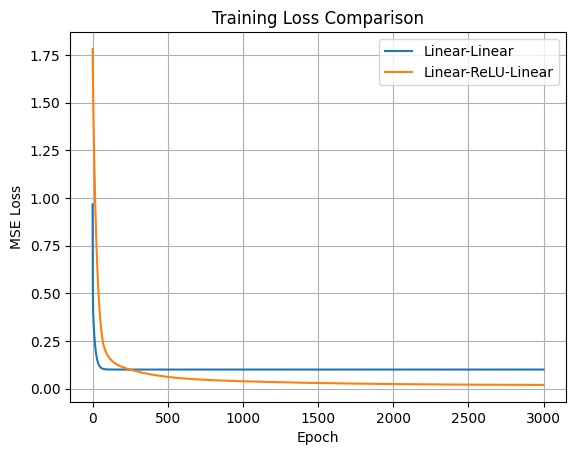

In [72]:
import matplotlib.pyplot as plt

plt.plot(losses_linear, label='Linear-Linear')
plt.plot(losses_relu, label='Linear-ReLU-Linear')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


✅ Visually:
The model with ReLU should show faster, deeper loss decrease.

## 📚 Section 8: Visualization of Predictions

🎯 Objective:

- Students plot model predictions against the true data.

- Visually compare:

    - Model A: Linear ➔ Linear

    - Model B: Linear ➔ ReLU ➔ Linear

- Understand how non-linearity helps model curved patterns.

### 🧠 Markdown Cell 8.1: Why Visualize Predictions?

# 8.1 Why Visualize Model Predictions?

✅ After training, it's very important to **visualize** how well your model has learned the relationship between input and output.

---

### 🔵 What We Expect:

- **Model A (Linear ➔ Linear):**
  - Should look mostly like a **straight line**
  - Will **struggle** to fit the curved target: $y = x^2 + \text{noise}$

- **Model B (Linear ➔ ReLU ➔ Linear):**
  - Should better capture the **nonlinear** curve
  - Predictions should follow the **"U"-shaped** pattern more closely

---

✅ **Visualizations help build intuition** beyond just looking at loss numbers!


✅ Students know why they are doing this.

### ✍️ Practice Task 8.1: Plot Predictions

### 🛠️ Practice Exercise 8.1

✅ Your Task:

1. For both models:
   - Use your trained `predict_linear(X)` and `predict_relu(X)` functions.
   - Predict outputs for the synthetic input `x`.

2. Create two subplots side by side:
   - One for Linear ➔ Linear predictions
   - One for Linear ➔ ReLU ➔ Linear predictions

3. In each subplot:
   - Scatter plot of true data points (x, y) — use a light color (e.g., gray or light blue).
   - Line plot of model predictions — use a bright color (e.g., red or green).

---

🔔 *Hints:*
- Use `plt.scatter()` for true data.
- Use `plt.plot()` for sorted predictions (to get smooth lines).
- Title each subplot clearly.

✅ This will show how much better the ReLU model fits the curve!

---


### 🖥️ Expected Plot Code (Instructor Reference)

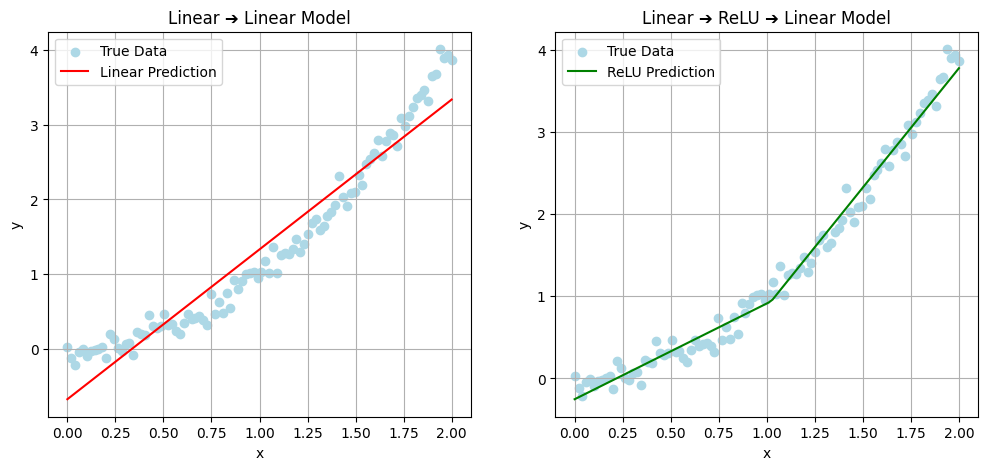

In [73]:
import matplotlib.pyplot as plt

# Predict outputs
y_pred_lin = predict_linear(x).detach()
y_pred_relu = predict_relu(x).detach()

# Sort x and corresponding predictions for nice plots
sorted_idx = torch.argsort(x.squeeze())

x_sorted = x.squeeze()[sorted_idx]
y_sorted_lin = y_pred_lin.squeeze()[sorted_idx]
y_sorted_relu = y_pred_relu.squeeze()[sorted_idx]
y_sorted_true = y.squeeze()[sorted_idx]

# Create subplots
plt.figure(figsize=(12,5))

# Model A: Linear ➔ Linear
plt.subplot(1, 2, 1)
plt.scatter(x_sorted.numpy(), y_sorted_true.numpy(), color='lightblue', label='True Data')
plt.plot(x_sorted.numpy(), y_sorted_lin.numpy(), color='red', label='Linear Prediction')
plt.title('Linear ➔ Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Model B: Linear ➔ ReLU ➔ Linear
plt.subplot(1, 2, 2)
plt.scatter(x_sorted.numpy(), y_sorted_true.numpy(), color='lightblue', label='True Data')
plt.plot(x_sorted.numpy(), y_sorted_relu.numpy(), color='green', label='ReLU Prediction')
plt.title('Linear ➔ ReLU ➔ Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()


# Note for me: I tried with 300 epochs, then 900, 1500 and lastly 3000

✅ Clear visual payoff:

- Linear ➔ Linear will look roughly straight (poor fit).

- Linear ➔ ReLU ➔ Linear will bend to fit the curve better!

## 📚 Section 9: Reflection — Why Nonlinearity Matters

🎯 Objective:

- Solidify students' understanding about why activation functions are needed.

- Quick MCQs to test key points.

- Short writing to encourage articulation and deeper thought.

✅ No coding — only reflective thinking.

### 🧠 Markdown Cell 9.1: Reflection Questions

### 9.1 Reflection: Why Nonlinearity Matters

✅ Now that you have trained and compared both models,  
let's reflect on what we learned about non-linearity in neural networks.

---


### ✍️ Practice Task 9.1: Quick MCQs

# 🛠️ Practice Exercise 9.1: MCQs

✅ Choose the correct answers:

---

**Q1. Why is it important to have activation functions in a neural network?**

- [x] To introduce non-linearity
- [ ] To make models faster
- [ ] To stack more layers without changing behavior
- [ ] To prevent training

---

**Q2. What happens if you stack multiple linear layers without activation functions?**

- [x] The model still behaves like a single linear transformation
- [ ] The model can learn complex curves
- [ ] The model becomes a deep decision tree
- [ ] The model automatically becomes nonlinear

---

**Q3. Which of the following is a commonly used activation function?**

- [x] ReLU
- [x] Sigmoid
- [x] Tanh
- [ ] Linear

---

✅ Write your selected answers below each question.

---


### ✍️ Practice Task 9.2: Short Reflection (3–5 Sentences)

### 🛠️ Practice Exercise 9.2: Short Written Reflection

✅ In 3–5 sentences, answer:

**Question:**  
After seeing the results of both models, explain in your own words why activation functions are important in deep learning.

---

🔔 *Hints:*
- Think about the ability to fit complex curves.
- Think about flexibility and power of the network.
- You can use your loss plots or prediction visualizations to support your answer.

✅ Write your answer in the Markdown cell below.

---
